In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
dataset=pd.read_csv('./data.csv')
# drop the last column from the data
dataset = dataset.drop(['Unnamed: 32','id'],axis = 1)
# Impute the only categorical column
dataset["diagnosis"].replace(to_replace = dict(M = 1, B = 0), inplace = True)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Class Split
0    357
1    212
Name: diagnosis, dtype: int64


Text(0, 0.5, 'Count')

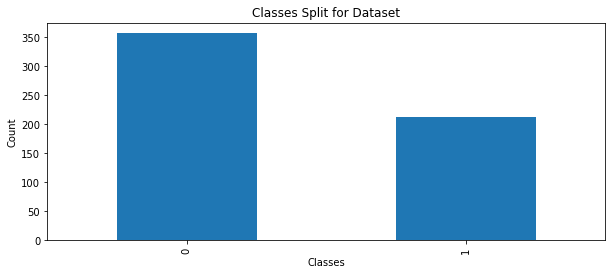

In [3]:
#Class Balance
print('Class Split')
print(dataset['diagnosis'].value_counts())
dataset['diagnosis'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

In [4]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(dataset,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('perimeter_mean', 'radius_mean'), ('area_mean', 'radius_mean'), ('area_mean', 'perimeter_mean'), ('concavity_mean', 'compactness_mean'), ('concave points_mean', 'radius_mean'), ('concave points_mean', 'perimeter_mean'), ('concave points_mean', 'area_mean'), ('concave points_mean', 'compactness_mean'), ('concave points_mean', 'concavity_mean'), ('perimeter_se', 'radius_se'), ('area_se', 'area_mean'), ('area_se', 'radius_se'), ('area_se', 'perimeter_se'), ('concavity_se', 'compactness_se'), ('fractal_dimension_se', 'compactness_se'), ('radius_worst', 'radius_mean'), ('radius_worst', 'perimeter_mean'), ('radius_worst', 'area_mean'), ('radius_worst', 'concave points_mean'), ('texture_worst', 'texture_mean'), ('perimeter_worst', 'radius_mean'), ('perimeter_worst', 'perimeter_mean'), ('perimeter_worst', 'area_mean'), ('perimeter_worst', 'concave points_mean'), ('perimeter_worst', 'radius_worst'), ('area_worst', 'radius_mean'), ('area_worst', 'perimeter_mean'), ('a

In [5]:
#Define x and y variable
x = dataset.drop('diagnosis',axis=1).to_numpy()
y = dataset['diagnosis'].to_numpy()

# Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)



In [6]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C=100) # Poly Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



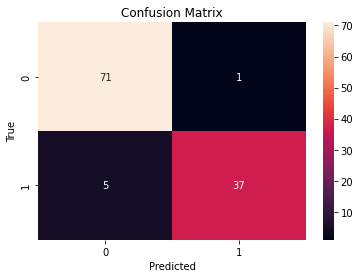

In [7]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))